### Ishika Kesarwani

# 500075359

# AIML BATCH 4

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
dataset = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\500075359\SEM 6\Cognitive Analytics LAB\salary_data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [15]:
X=dataset["YearsExperience"].values
y=dataset["Salary"].values

In [17]:
def extractDigits(lst):
    return [[el] for el in lst]

In [18]:
X_l=extractDigits(X)
X_l = np.array(X_l)

In [20]:
class PolynomailRegression() :
    def __init__(self, degree, learning_rate, iterations):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def transformVector(self, X):
        X_transform = np.ones((self.m, 1))
        j = 0
        for j in range(self.degree + 1):
            if j != 0:
                x_pow = np.power(X, j)
                X_transform = np.append( X_transform, x_pow.reshape(-1, 1),axis=1)
        return X_transform
    
    def normalizeVector(self, X):
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0))/np.std(X[:, 1:],axis=0)
        return X
    
    def run(self,X,Y):
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape
        self.W = np.zeros(self.degree + 1)
        X_transform = self.transformVector(self.X)
        X_normalize = self.normalizeVector(X_transform)
        for i in range(self.iterations): #gradient descent
            h = self.getResults(self.X)
            error = h - self.Y
            self.W = self.W - self.learning_rate * (1/self.m)*np.dot(X_normalize.T,error)
        return self

    def getResults(self,X):
        X_transform = self.transformVector(X)
        X_normalize = self.normalizeVector(X_transform)
        return np.dot(X_transform, self.W)


In [21]:
model = PolynomailRegression(degree = 2, learning_rate = 0.02, iterations = 750)
model.run(X_l,y)

In [22]:
y_pred = model.getResults(X)
print(y_pred)

[ 40563.14370746  41909.86656564  43279.48950948  46803.73474387
  48253.50798753  53508.05251497  54281.60181884  55845.87549083
  55845.87549083  59856.74754559  61501.1715174   62331.97103543
  62331.97103543  63168.49557488  66571.84394683  70066.79266144
  71848.61714724  73653.3417187   79204.91594709  80150.21589344
  87918.71623525  90926.36671679  99198.66894321 102395.24513149
 107837.37254027 111171.34924253 116842.47750795 117993.87822529
 126213.98384627 128614.11064501]


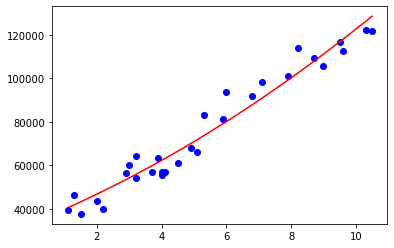

In [23]:
plt.scatter(X,y,color='Blue')
plt.plot(X,y_pred,color='Red')
plt.show()